Trabalho EEL874 Inteligência Articial

Aluno: Lucas Manoel de Assis Ventura Trogo
DRE 122168184

O trabalho consiste em um sistema de recomendação de filmes usando lógica fuzzy, para criar um sistema de recomendação baseado em três inputs: avaliação do filme, popularidade do filme e preferência do gênero. O output será uma classificação de recomendação.

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Cria as variáveis de entrada
avaliacao = ctrl.Antecedent(np.arange(0, 11, 1), 'avaliacao')
popularidade = ctrl.Antecedent(np.arange(0, 11, 1), 'popularidade')
preferencia_genero = ctrl.Antecedent(np.arange(0, 11, 1), 'preferencia_genero')

In [3]:
# Cria a variável de saída
recomendacao = ctrl.Consequent(np.arange(0, 11, 1), 'recomendacao')

In [4]:
# Define funções de pertinência para as variáveis de entrada e saída
avaliacao.automf(3)
popularidade.automf(3)
preferencia_genero.automf(3)

In [5]:
recomendacao['baixa'] = fuzz.trimf(recomendacao.universe, [0, 0, 5])
recomendacao['média'] = fuzz.trimf(recomendacao.universe, [0, 5, 10])
recomendacao['alta'] = fuzz.trimf(recomendacao.universe, [5, 10, 10])

c:\Users\lmtro\AppData\Local\Programs\Python\Python36\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


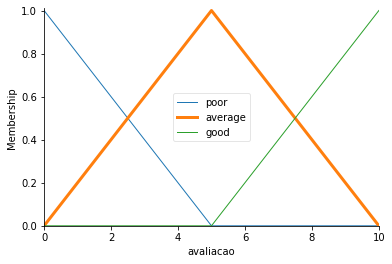

In [6]:
avaliacao['average'].view()

c:\Users\lmtro\AppData\Local\Programs\Python\Python36\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


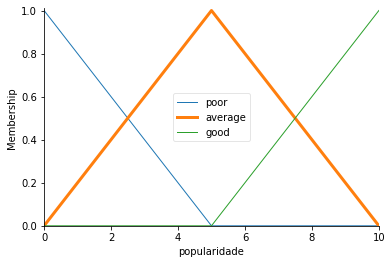

In [7]:
popularidade['average'].view()

c:\Users\lmtro\AppData\Local\Programs\Python\Python36\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


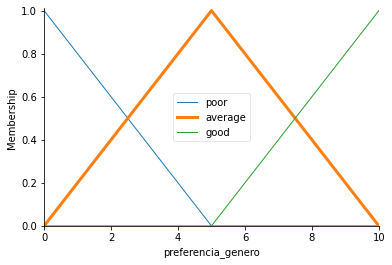

In [8]:
preferencia_genero['average'].view()

c:\Users\lmtro\AppData\Local\Programs\Python\Python36\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


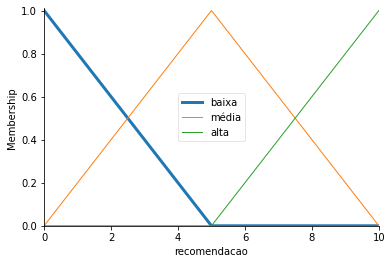

In [9]:
recomendacao['baixa'].view()

In [10]:
# Regras Fuzzy
regra1 = ctrl.Rule(avaliacao['poor'] | popularidade['poor'] | preferencia_genero['poor'], recomendacao['baixa'])
regra2 = ctrl.Rule(avaliacao['average'] & popularidade['average'] & preferencia_genero['average'], recomendacao['média'])
regra3 = ctrl.Rule(avaliacao['good'] | popularidade['good'] | preferencia_genero['good'], recomendacao['alta'])

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

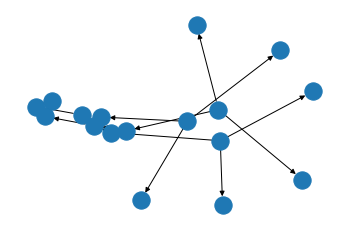

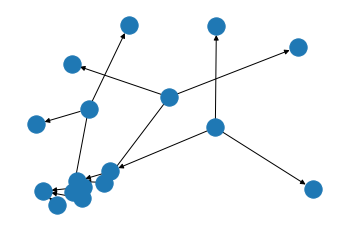

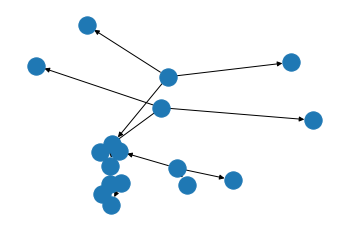

In [11]:
regra1.view()
regra2.view()
regra3.view()

In [12]:
# Cria o sistema de controle
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])

In [13]:
# Cria a simulação
simulacao = ctrl.ControlSystemSimulation(sistema_controle)

In [14]:
# Defina os valores de entrada
simulacao.input['avaliacao'] = 7.5
simulacao.input['popularidade'] = 6.0
simulacao.input['preferencia_genero'] = 8.0

In [15]:
# Calcule a recomendação
simulacao.compute()

In [16]:
# Obtenha o valor de recomendação
recomendacao_final = simulacao.output['recomendacao']

5.878048780487805


c:\Users\lmtro\AppData\Local\Programs\Python\Python36\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


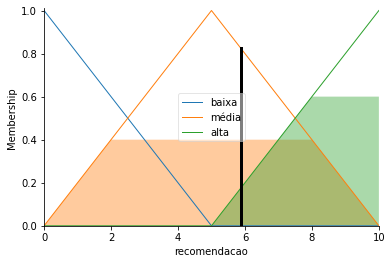

In [17]:
# Visualize a recomendação
print(recomendacao_final)
recomendacao.view(sim=simulacao)